# Q1: Difference between K-Means and Hierarchical Clustering with use cases
# K-Means is a centroid-based clustering algorithm that partitions data into a fixed
# number of clusters (K) by minimizing intra-cluster variance.
# It is fast and scalable but requires the number of clusters to be specified in advance.
# Use case: Customer segmentation for large datasets where the number of groups is known.
#
# Hierarchical Clustering builds a tree-like structure (dendrogram) of clusters either
# bottom-up (agglomerative) or top-down (divisive).
# It does not require predefining the number of clusters and provides interpretability.
# Use case: Gene expression analysis or small datasets where hierarchy matters.


# Q2: Purpose of the Silhouette Score
# The Silhouette Score measures how well data points fit within their assigned cluster
# compared to other clusters.
# It ranges from -1 to 1:
# - Close to 1: well-clustered
# - Around 0: overlapping clusters
# - Negative: likely misclassified
# It helps evaluate clustering quality without ground-truth labels.


# Q3: Core parameters of DBSCAN and their influence
# eps: Maximum distance between two points to be considered neighbors.
# min_samples: Minimum number of points required to form a dense region.
#
# Smaller eps leads to more noise points.
# Larger min_samples makes clusters denser and reduces false clusters.
# These parameters control cluster shape and noise detection.


# Q4: Importance of feature scaling in clustering
# Clustering algorithms rely on distance calculations.
# Without scaling, features with larger magnitudes dominate distance measures.
# Feature scaling ensures all features contribute equally, improving cluster accuracy,
# especially for K-Means and DBSCAN.


# Q5: Elbow Method in K-Means
# The Elbow Method plots the number of clusters (K) against within-cluster sum of squares.
# The point where the decrease in inertia slows down (forming an elbow) indicates the
# optimal number of clusters.
#
# Q10: Real-world customer segmentation workflow
# - Algorithm choice: K-Means for large structured data, DBSCAN to detect anomalies.
# - Preprocessing: Handle missing values, encode categorical features, scale numerical data.
# - Cluster selection: Elbow Method, Silhouette Score, business validation.
# - Business value: Enables personalized promotions, improves customer retention,
#   and optimizes marketing spend through targeted strategies.

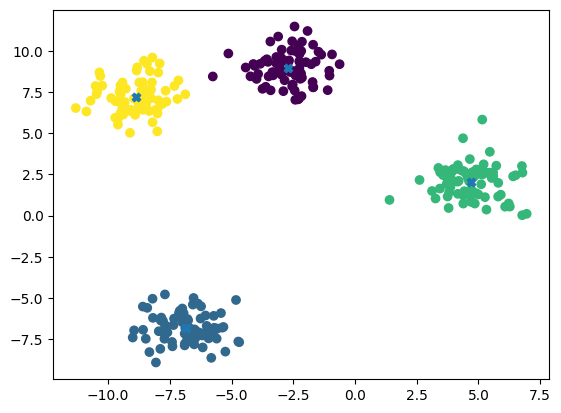

In [1]:
# Q6: KMeans clustering on synthetic blob data

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

plt.scatter(X[:, 0], X[:, 1], c=labels)
plt.scatter(centers[:, 0], centers[:, 1], marker='X')

In [2]:
# Q7: DBSCAN clustering on scaled Wine dataset

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

data = load_wine()
X = data.data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

dbscan = DBSCAN(eps=1.2, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

num_clusters = len(set(labels)) - (1 if -1 in labels else 0)


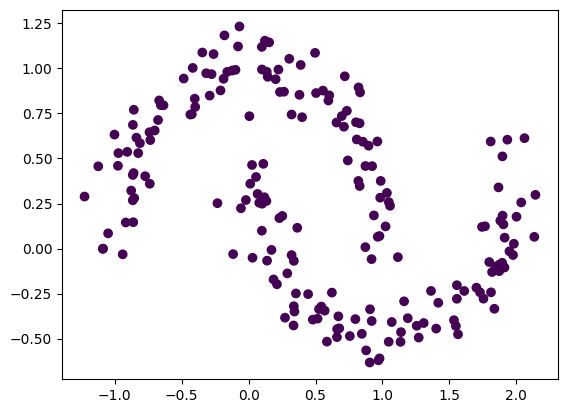

In [3]:
# Q8: DBSCAN on moon-shaped data with outliers highlighted

from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, _ = make_moons(n_samples=200, noise=0.1, random_state=42)

dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=labels)

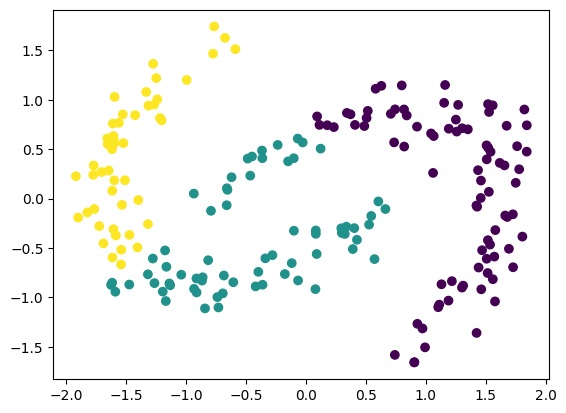

In [4]:
# Q9: PCA + Agglomerative Clustering on Wine dataset

from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

agg = AgglomerativeClustering(n_clusters=3)
labels = agg.fit_predict(X_pca)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)

In [5]:
# Q10: Example clustering workflow for customer segmentation

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(X_scaled)

silhouette_avg = silhouette_score(X_scaled, cluster_labels)